# Jigsaw Benchmark Experiment
> Benchmark model experiment for Jigsaw Multilingual Toxic Comment Classification.
- toc: true
- badges: true
- comments: true
- author: Aman Arora

I wanted to try a tiny little experiment of submitting the multilingual model without any training to check the basic score that we get. 

I followed the same script to make a submission and got a score of 0.5630. So, this makes me happy that the model we used in the previous post is definitely learning how to classify toxicity.

Now we will move forward to try out training our multilingual model for various different languages in the test set to classify toxicity. 

 Stay tuned for more!

## Next Steps

So what are we going to do for the next steps? 

- **FOCAL LOSS:** From this kernel [here](https://www.kaggle.com/miklgr500/jigsaw-tpu-bert-with-huggingface-and-keras) I found that focal loss is a way to deal with class imbalance which is certainly the case here since we are working with data where only a very small amount of comments are toxic. In tensorflow, the author has defined the focal loss as:

```python 
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=.2):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed
```

- **TOKENIZERS:** From the same kernel I found that using the [Tokenizers](https://github.com/huggingface/tokenizers) by Hugging Face is a better option than the default tokenizer in `transformers` library because the tokenizers are ulta-fast. From the docs: 
> Extremely fast (both training and tokenization), thanks to the Rust implementation. Takes less than 20 seconds to tokenize a GB of text on a server's CPU.

Particularly we will be making use of this `fast_encode` function from the [same kernel](https://www.kaggle.com/miklgr500/jigsaw-tpu-bert-with-huggingface-and-keras) referenced before: 
```python 
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)
```

The above function makes use of Hugging Face's [tokenizers library](https://github.com/huggingface/tokenizers) and truncates the text to `max_length`, adds padding if required and finally calls `encode_batch`. Finally, extends the list and returns the encoded ids as a `np.array`.

- From the same kernel, we realize that valid and test files are all english translated. And the author is able to get an AUC score of 0.914. 

- **COSINE LEARNING RATE SCHEDULER:** Try Cosine Learning rate scheduler. The same kernel uses the following LR scheduler: 
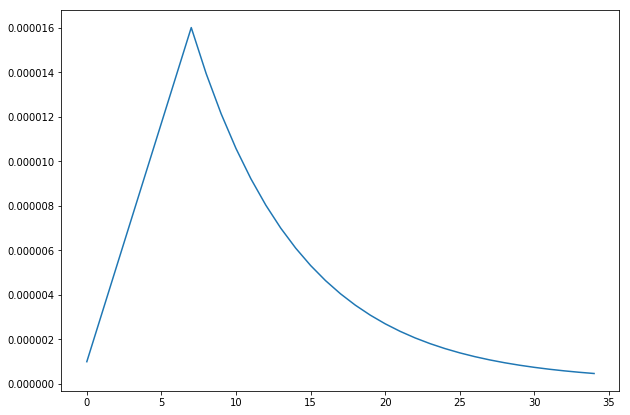

- **ROC AUC:** Use ROC score for validation.